In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [11]:
#1 Preprocesamiento de datos

# Generar datos para una serie de tiempo sintética
np.random.seed(0) #Fijar semilla para reproducibilidad
n_samples = 200 #Número de puntos de datos en la serie de tiempo
t= np.arange(n_samples) #Valores de tiempo

# Crear una serie de tiempo sintética (en este caso, creciente)
times_series = 0.1*t + np.random.randn(n_samples)
print("time series", times_series)

time series [ 1.76405235  0.50015721  1.17873798  2.5408932   2.26755799 -0.47727788
  1.55008842  0.54864279  0.69678115  1.3105985   1.14404357  2.55427351
  1.96103773  1.42167502  1.84386323  1.83367433  3.09407907  1.49484174
  2.1130677   1.04590426 -0.55298982  2.7536186   3.0644362   1.55783498
  4.66975462  1.04563433  2.64575852  2.51281615  4.33277921  4.36935877
  3.15494743  3.47816252  2.31221425  1.31920353  3.05208785  3.65634897
  4.83029068  4.90237985  3.41267318  3.59769725  2.95144703  2.67998206
  2.49372981  6.2507754   3.89034782  4.0619257   3.34720464  5.47749036
  3.18610215  4.68725972  4.10453344  5.4869025   4.68919486  4.11936782
  5.37181777  5.92833187  5.66651722  6.0024719   5.16567791  5.53725883
  5.32753955  5.74044684  5.38685372  4.5737174   6.57742614  6.09821906
  4.96980165  7.16278226  5.89270164  6.9519454   7.72909056  7.22898291
  8.33940068  6.06517418  7.80234164  6.81518991  6.72920285  7.12115034
  7.48844747  7.95616534  6.83485016  9

In [12]:
#2 División de datos

train_size = int(len(times_series) * 0.8) #Tamaño del conjunto de entrenamiento
train_data, test_data = times_series[:train_size], times_series[train_size:]
print("train data", train_data)
print("test data", test_data)

train data [ 1.76405235  0.50015721  1.17873798  2.5408932   2.26755799 -0.47727788
  1.55008842  0.54864279  0.69678115  1.3105985   1.14404357  2.55427351
  1.96103773  1.42167502  1.84386323  1.83367433  3.09407907  1.49484174
  2.1130677   1.04590426 -0.55298982  2.7536186   3.0644362   1.55783498
  4.66975462  1.04563433  2.64575852  2.51281615  4.33277921  4.36935877
  3.15494743  3.47816252  2.31221425  1.31920353  3.05208785  3.65634897
  4.83029068  4.90237985  3.41267318  3.59769725  2.95144703  2.67998206
  2.49372981  6.2507754   3.89034782  4.0619257   3.34720464  5.47749036
  3.18610215  4.68725972  4.10453344  5.4869025   4.68919486  4.11936782
  5.37181777  5.92833187  5.66651722  6.0024719   5.16567791  5.53725883
  5.32753955  5.74044684  5.38685372  4.5737174   6.57742614  6.09821906
  4.96980165  7.16278226  5.89270164  6.9519454   7.72909056  7.22898291
  8.33940068  6.06517418  7.80234164  6.81518991  6.72920285  7.12115034
  7.48844747  7.95616534  6.83485016  9.

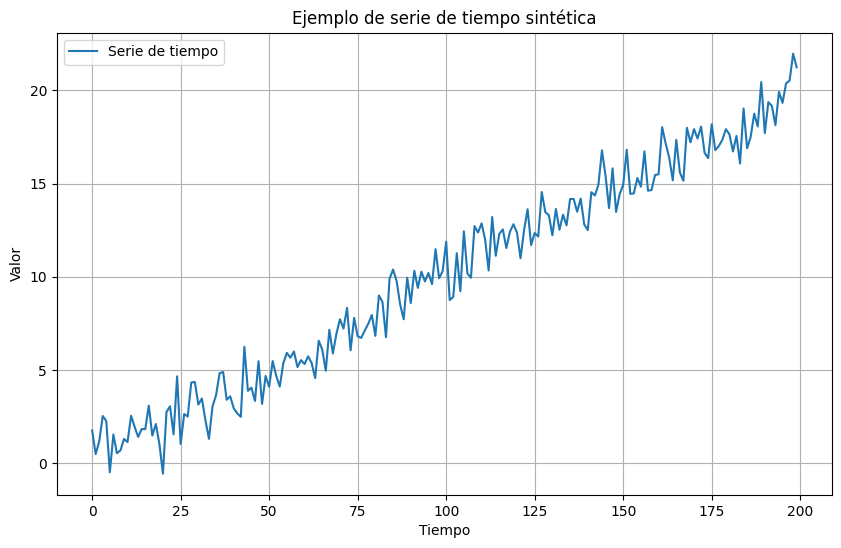

In [13]:
#3. Graficar la serie de tiempo sintética
plt.figure(figsize=(10, 6))
plt.plot(t, times_series, label='Serie de tiempo')
plt.title('Ejemplo de serie de tiempo sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 4. Preparación datos LSTM
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

In [15]:
#5. Contrucción del modelo LSTM
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length, 1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 16, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#6. Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 93.4252
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 64.3656
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28.4411
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.5496
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7077
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9783
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9877
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5961
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8879
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.5982
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2869
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2285
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0950
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0137
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1319
Epoch 16/100
5/

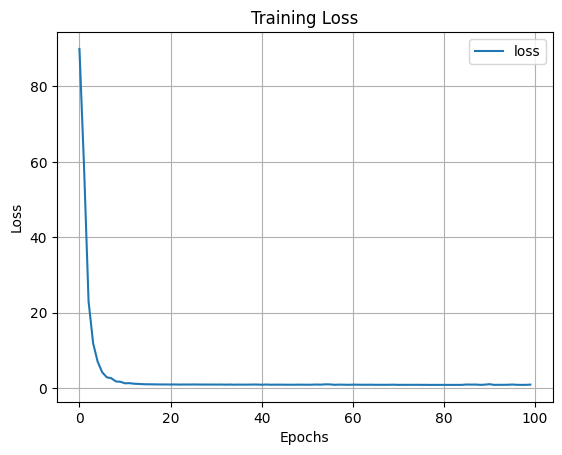

In [17]:
#7. Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100)

# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [18]:
#8. Evaluación del modelo
Evaluacion = model.evaluate(X_test, y_test)
print(Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 2.9086
2.908583402633667


In [19]:
#9. Predicción
y_pred = model.predict(X_test)
print("y_test: \n",y_test)
print("y_pred: \n",y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
y_test: 
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
y_pred: 
 [[15.9680395]
 [17.94681  ]
 [16.240211 ]
 [17.215471 ]
 [16.860298 ]
 [16.689516 ]
 [17.537725 ]
 [16.103054 ]
 [17.944616 ]
 [16.43053  ]
 [16.897636 ]
 [17.486822 ]
 [16.361015 ]
 [18.739096 ]
 [16.024206 ]
 [19.363724 ]
 [16.339708 ]
 [18.204243 ]
 [18.185314 ]
 [16.353472 ]
 [21.1011   ]
 [16.244333 ]
 [21.208536 ]
 [17.403091 ]]


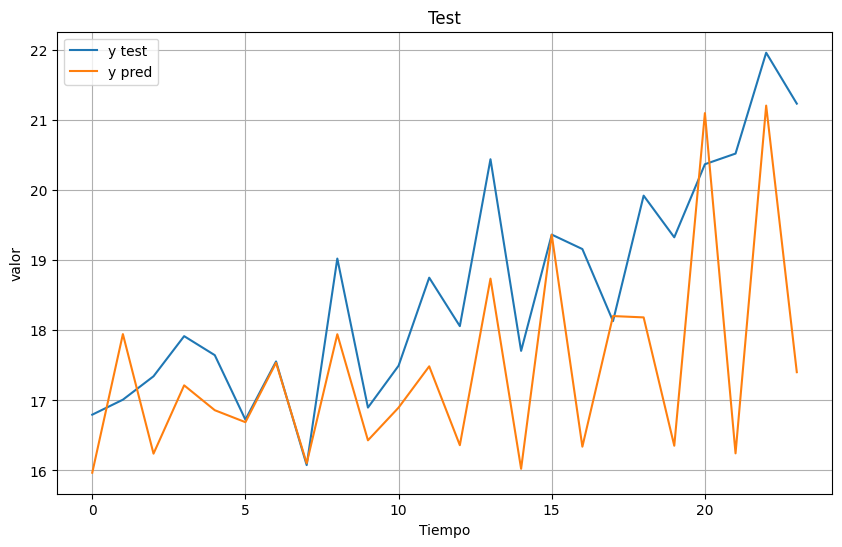

In [20]:
#10.Graficar de la data de test vs pronóstico la serie de tiempo
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='y test')
plt.plot(y_pred, label='y pred')
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.show()